# Analysis of Tree Locations Within the Pack File


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import custom_plot_tools

### Objects used by each commit in each area

The first line informs on the number of objects in each area. The following lines inform on the percentage of these objects that is used by the commits.


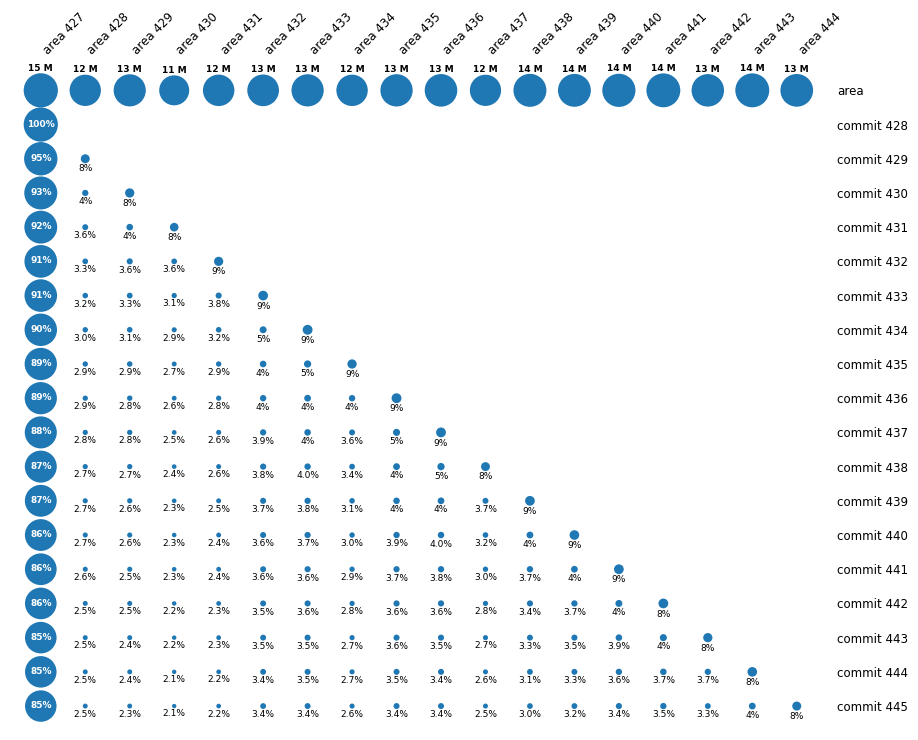

In [2]:
custom_plot_tools.plot_areas_and_trees('/tmp/areas.csv', '/tmp/trees_in_areas.csv', 'count')

💡 All the numbers in the first column are greater or equal to 85%. This indicates that most of the objects of the snapshot stay referenced by new commits for a long time.

💡 All the number in the other columns are below 10%. This indicates that most of the new objects are short-lived garbage for a user that doesn't care about history.

💡 Commit 428 (the first commit) always uses everything in area 427 (the snapshot import area).

💡 Commit 429 (which resembles to a typical freeze commit) uses 95% of the objects of area 427 and 8% of area 428.


### Inodes used by each commit in each area


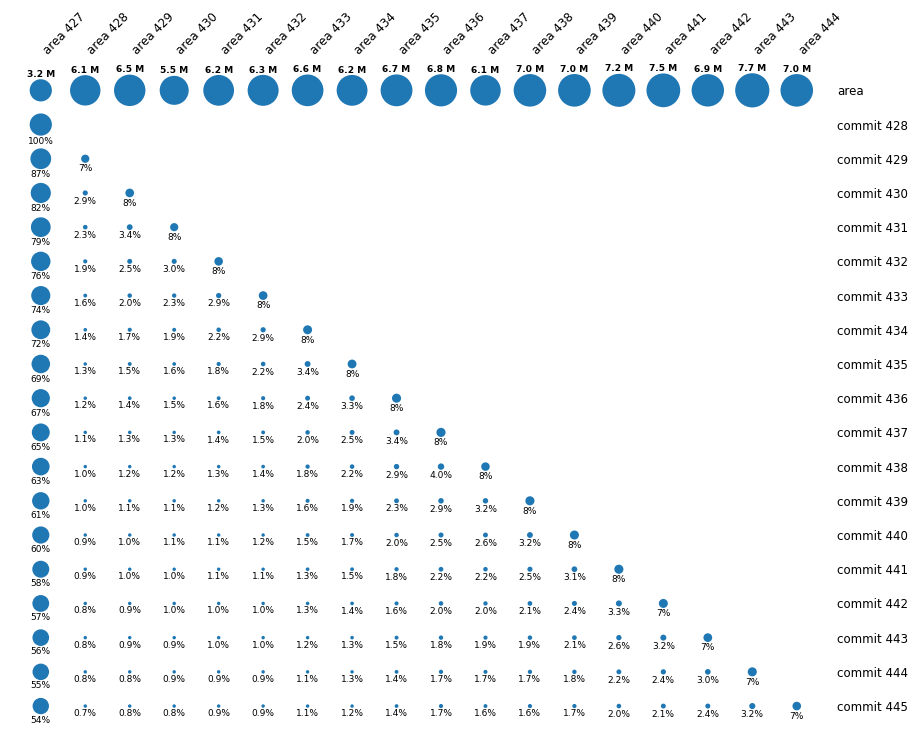

In [3]:
custom_plot_tools.plot_areas_and_trees('/tmp/areas.csv', '/tmp/trees_in_areas.csv', 'inner_count')

💡 All the percentages here are significantly lower than in the previous plot. This indicates that there is a larger turn-over with inodes than with other object kind.


### Bytes used by each commit in each area


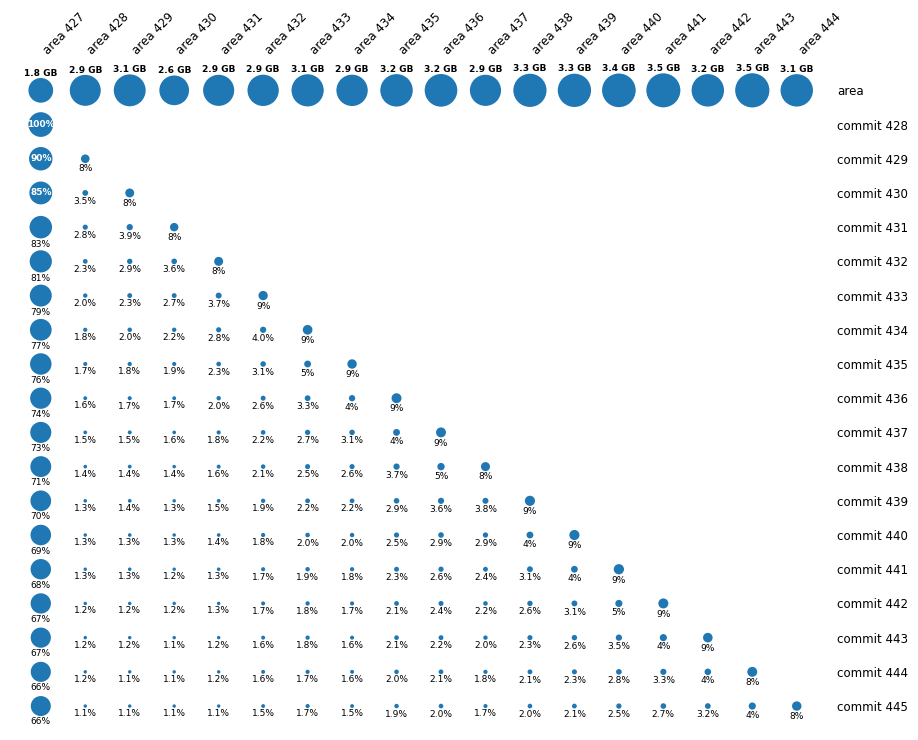

In [4]:
custom_plot_tools.plot_areas_and_trees('/tmp/areas.csv', '/tmp/trees_in_areas.csv', 'bytes')

💡 Commit 429 uses 90% of the bytes of area 427 and 8% of area 428.


### Pages used by each commit in each area


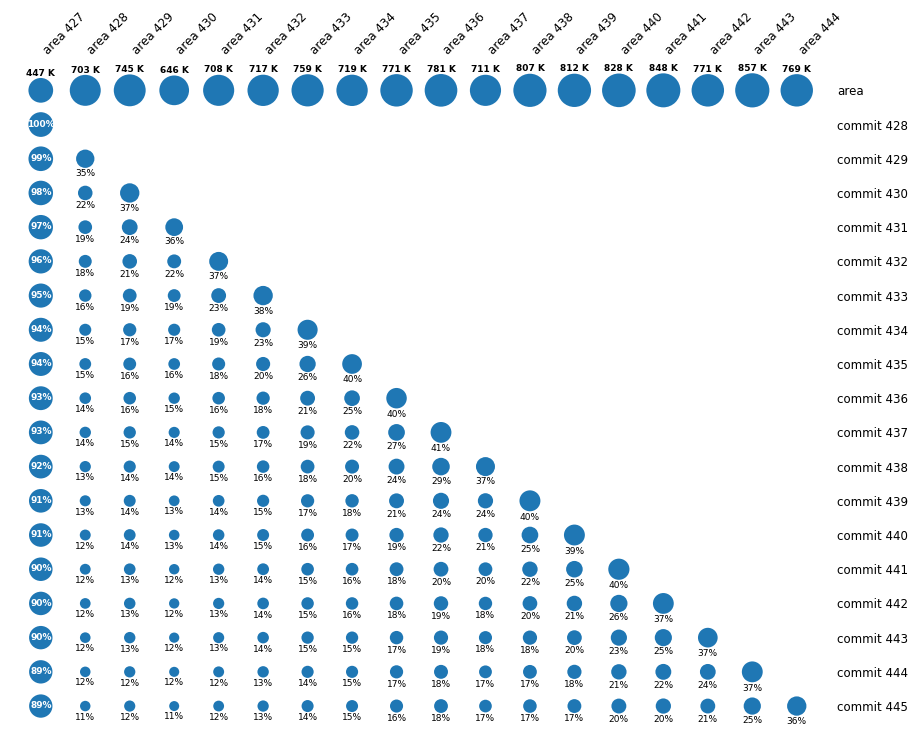

In [5]:
custom_plot_tools.plot_areas_and_trees('/tmp/areas.csv', '/tmp/trees_in_areas.csv', 'pages')

💡 Commit 429 spans on 99% of the pages of area 427 and 35% of the pages of area 429.


### Chunks of Consecutive Bytes of Commit Trees

The tree of commit 428 is fully contained in area 427, which (almost) contains nothing else. This makes the file to file copy of commit 428 lightning fast.

However, all the other commit trees suffer fragmentation.

The following table shows the number of chunks for each commit.

```
commit
428       2
429    1.0M
430    1.4M
431    1.6M
432    1.8M
433    2.0M
434    2.2M
435    2.4M
436    2.7M
437    2.9M
438    3.1M
439    3.2M
440    3.4M
441    3.6M
442    3.7M
443    3.9M
444    4.0M
445    4.2M
dtype: object
```

💡 This list can be seen as the number of offset intervals that a "sparse pack file" would be made of. It grows freeze after freeze, as the fragmentation of offset increases.

💡 Commit 428 might be split in two because of the genesis commit.

<br/>

The following table indicates the number of chunks that each commit tree span on in each area. This corresponds to the number of small copies that must be performed to fully copy a tree form file to file.

```
area      427   428   429   430   431   432   433   434   435   436   437   438   439   440   441   442   443   444
commit                                                                                                             
428         2     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
429      529k  429k     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
430      666k  219k  470k     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
431      727k  187k  258k  408k     0     0     0     0     0     0     0     0     0     0     0     0     0     0
432      780k  165k  211k  198k  466k     0     0     0     0     0     0     0     0     0     0     0     0     0
433      819k  150k  183k  162k  224k  487k     0     0     0     0     0     0     0     0     0     0     0     0
434      855k  139k  165k  141k  182k  234k  519k     0     0     0     0     0     0     0     0     0     0     0
435      894k  132k  155k  130k  164k  198k  282k  493k     0     0     0     0     0     0     0     0     0     0
436      923k  127k  147k  122k  151k  173k  224k  255k  531k     0     0     0     0     0     0     0     0     0
437      951k  122k  140k  115k  141k  160k  199k  215k  293k  547k     0     0     0     0     0     0     0     0
438      972k  118k  135k  110k  134k  151k  188k  196k  262k  333k  454k     0     0     0     0     0     0     0
439      987k  114k  130k  106k  127k  143k  173k  178k  226k  269k  236k  540k     0     0     0     0     0     0
440     1000k  111k  126k  102k  122k  137k  163k  165k  206k  239k  204k  285k  533k     0     0     0     0     0
441     1011k  108k  123k   99k  118k  132k  156k  157k  193k  221k  185k  239k  280k  547k     0     0     0     0
442     1022k  103k  117k   96k  114k  128k  152k  151k  185k  209k  173k  216k  237k  304k  534k     0     0     0
443     1028k  101k  115k   94k  112k  126k  148k  146k  179k  201k  165k  202k  215k  263k  307k  476k     0     0
444     1036k   99k  111k   91k  108k  122k  144k  141k  173k  194k  157k  189k  199k  235k  257k  250k  529k     0
445     1042k   98k  109k   89k  105k  120k  141k  138k  170k  189k  152k  182k  188k  220k  235k  219k  299k  459k
```

💡 The column for area 427 grows downward, indicating the increase in fragmentation as commits get older. The other columns shrink downward, which is a bit strange.

<br/>

That last table shows the average length in bytes of each of these chunks.

```
area     427  428  429  430  431  432  433  434  435  436  437  438  439  440  441  442  443  444
commit                                                                                           
428     916M                                                                                     
429     3114  515                                                                                
430     2350  459  509                                                                           
431     2091  425  461  527                                                                      
432     1896  401  416  483  521                                                                 
433     1765  387  389  441  481  535                                                            
434     1655  375  369  410  438  499  542                                                       
435     1548  365  355  385  405  458  497  539                                                  
436     1471  357  343  370  383  432  454  473  556                                             
437     1400  350  332  356  366  413  426  423  484  541                                        
438     1346  345  325  346  352  402  410  395  450  490  542                                   
439     1301  340  319  338  341  392  395  371  411  427  463  573                              
440     1268  337  315  332  335  387  386  356  389  395  412  492  577                         
441     1237  334  311  327  329  382  379  345  375  375  381  435  492  577                    
442     1210  336  311  324  324  380  374  338  367  364  362  403  437  504  566               
443     1192  335  309  320  321  378  372  333  362  356  350  383  407  449  499  577          
444     1171  334  309  317  319  377  370  328  359  351  339  370  384  408  440  518  561     
445     1154  333  308  316  317  375  368  325  355  345  330  357  367  383  404  455  516  582
```

